<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-of-functions,-packages,-and-data" data-toc-modified-id="Load-of-functions,-packages,-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load of functions, packages, and data</a></span></li><li><span><a href="#Regress-backward-beta-values" data-toc-modified-id="Regress-backward-beta-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regress backward beta values</a></span><ul class="toc-item"><li><span><a href="#Examning-the-numbers-of-beta-values-we-get" data-toc-modified-id="Examning-the-numbers-of-beta-values-we-get-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examning the numbers of beta values we get</a></span></li><li><span><a href="#Creating-low,-middle,-and-high-beta-values-groups-(portfolio-creation)" data-toc-modified-id="Creating-low,-middle,-and-high-beta-values-groups-(portfolio-creation)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Creating low, middle, and high beta values groups (portfolio creation)</a></span></li><li><span><a href="#Backward-beta-results" data-toc-modified-id="Backward-beta-results-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Backward beta results</a></span></li></ul></li><li><span><a href="#Regress-forward-beta-values" data-toc-modified-id="Regress-forward-beta-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regress forward beta values</a></span><ul class="toc-item"><li><span><a href="#Examning-the-numbers-of-beta-values-we-get" data-toc-modified-id="Examning-the-numbers-of-beta-values-we-get-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Examning the numbers of beta values we get</a></span></li><li><span><a href="#Creating-low,-middle,-and-high-beta-values-groups-(portfolio-creation)" data-toc-modified-id="Creating-low,-middle,-and-high-beta-values-groups-(portfolio-creation)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Creating low, middle, and high beta values groups (portfolio creation)</a></span></li><li><span><a href="#Forward-beta-results" data-toc-modified-id="Forward-beta-results-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Forward beta results</a></span></li></ul></li><li><span><a href="#Step-2-in-Baker-&amp;-Wurgler" data-toc-modified-id="Step-2-in-Baker-&amp;-Wurgler-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 2 in Baker &amp; Wurgler</a></span><ul class="toc-item"><li><span><a href="#Second-regression" data-toc-modified-id="Second-regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Second regression</a></span></li><li><span><a href="#Third-regression" data-toc-modified-id="Third-regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Third regression</a></span></li></ul></li></ul></div>

## Load of functions, packages, and data

In [1]:
def geomean(data):
    
    n = data.shape[0]
    
    
    return (data+1).prod()**(1/n)-1

In [5]:
"""
Backward beta function for rolling backward beta
"""

def market_beta(X,Y,min_win,max_win):
    """ 
    X = The independent variable which is the Market
    Y = The dependent variable which is the Stock
    min_win = minimum length of the window
    max_win = maximum length of the window
    
    It returns the alphas and the betas of
    the rolling regression
    """
    
    # all the observations
    obs = len(X)
    
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
    
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
    
    
    regressor = LinearRegression()
    for i in range(min_win,obs,1):
        if i <= max_win: #to get the expanding window
            if np.isnan(Y.to_numpy()[1 : i+1]).sum() > 0: #if missing values in the window then pass
                pass
            else:
                regressor.fit(X.to_numpy()[1 : i+1].reshape(-1,1), Y.to_numpy()[1: i+1])
                betas[i]  = regressor.coef_[0]
                alphas[i]  = regressor.intercept_
        else: #the rolling window when periode = max window
            if np.isnan(Y.to_numpy()[i-max_win : i+1]).sum() > 0:
                pass
            else:
                regressor.fit(X.to_numpy()[i-max_win : i+1].reshape(-1,1), Y.to_numpy()[i-max_win : i+1])
                betas[i]  = regressor.coef_[0]
                alphas[i]  = regressor.intercept_
        
    return pd.DataFrame({'Alpha': alphas, 'Beta': betas})
 

In [ ]:
"Forward beta function for rolling forward beta"

def market_beta_for(X,Y,min_win,max_win):
    """ 
    X = The independent variable which is the Market
    Y = The dependent variable which is the Stock
    min_win = minimum length of the window
    max_win = maximum length of the window
    
    It returns the alphas and the betas of
    the rolling regression
    """
    
    # all the observations
    obs = len(X)
    
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
    
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
    
    
    regressor = LinearRegression()
    for i in range(0,obs-min_win,1):
        if i >= obs-max_win: 
            if np.isnan(Y.to_numpy()[i+1 : -1]).sum() > 0:
                pass
            else:
                regressor.fit(X.to_numpy()[i+1 : -1].reshape(-1,1), Y.to_numpy()[i+1: -1])
                betas[i]  = regressor.coef_[0]
                alphas[i]  = regressor.intercept_
        else: #the rolling window when periode = max window
            if np.isnan(Y.to_numpy()[i+1 : i+max_win]).sum() > 0:
                pass
            else:
                regressor.fit(X.to_numpy()[i+1 : i+max_win].reshape(-1,1), Y.to_numpy()[i+1 : i+max_win])
                betas[i]  = regressor.coef_[0]
                alphas[i]  = regressor.intercept_
        
    return pd.DataFrame({'Alpha': alphas, 'Beta': betas})
 

In [2]:
%load_ext autoreload
%autoreload 2

"""
Load relevant packages 
"""
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import pandas_datareader as pdr
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.metrics import r2_score
from typing import Union, List
import math as m
from sklearn import datasets, linear_model
import statsmodels.api as sm

In [3]:
"""
Set path to get save data
"""
path = "/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Eikon"
os.chdir(path) 

In [4]:
"""
Load saved dataframes and dictionareis
"""
with open('df_mkt', 'rb') as data_market_df:
    df_mkt = pickle.load(data_market_df)
    
with open('df_rf', 'rb') as data_riskfree_df:
    df_rf = pickle.load(data_riskfree_df)

with open('data_calc', 'rb') as data_dict_calc:
    data_calc = pickle.load(data_dict_calc)  
    
with open('data_calc_win', 'rb') as data_dict_win:
    data_calc_win = pickle.load(data_dict_win) 
    
with open('dict_sort', 'rb') as data_sort_list:
    dict_sort = pickle.load(data_sort_list) 

## Regress backward beta values

In [6]:
"""
Apply the market backward beta function on data
"""
regress_calc = {}

for i in data_calc_win.keys():
    regress_calc[i] = market_beta(df_mkt['EUROPE IM (excess)'],data_calc_win[i].iloc[:,2], 12, 24) #set minimum and max window here
    regress_calc[i].set_index(data_calc_win[i].index)

In [7]:
"""
We save the dictionary in memory so we can call it in another notebook
"""
with open('regress_calc', 'wb') as regress: #save backward beta
   pickle.dump(regress_calc, regress)

In [8]:
"""
We drop the first 12 observations because we know they wil be nan
"""
for i in data_calc_win.keys():
    regress_calc[i] = regress_calc[i].drop([0,1,2,3,4,5,6,7,8,9,10,11])

### Examning the numbers of beta values we get

In [9]:
"""
To count the numbers of beta values overall
"""
dim_1 = 264
dim_3 = len(data_calc_win.keys())

print(dim_1*dim_3)

check=pd.DataFrame()
check.loc['beta', 'obs'] = '{:,.0f}'.format(dim_1*dim_3-np.count_nonzero(np.isnan(np.array([regress_calc[j].iloc[:,1] for j in regress_calc.keys()]))),4)
check.loc['nan', 'obs'] = '{:,.0f}'.format(np.count_nonzero(np.isnan(np.array([regress_calc[j].iloc[:,1] for j in regress_calc.keys()]))),4)
check

59664


,obs
beta,"37,998"
nan,"21,666"


(0.0, 226.0)

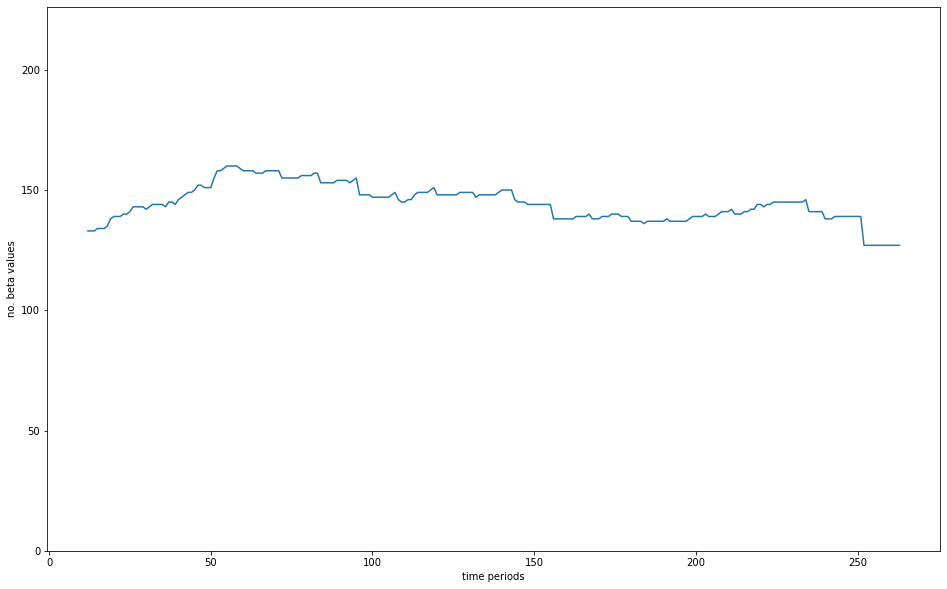

In [10]:
"""
To show how the numbers of betas values develop through the timeserie
"""

#here we count the numbers of beta values in each timestep and see how much deviation there is in numbers of banks
dim_1 = 264
dim_3 = len(data_calc_win.keys())

check=pd.DataFrame()

for i in range(12,264):
    check.loc[i, 'obs'] = dim_3-np.count_nonzero(np.isnan(np.array([regress_calc[j].iloc[i,1] for j in regress_calc.keys()])))

# here we plot it   
fig, ax = plt.subplots(1, 1,figsize=(16,10))
ax.plot(check.index,check)
ax.set_ylabel('no. beta values')
ax.set_xlabel('time periods')
ax.set_ylim([0.0,226])

### Creating low, middle, and high beta values groups (portfolio creation)

In [12]:
"""
To have a dataframe with all the backward betas
"""
beta = pd.concat([regress_calc[i].Beta for i in list(regress_calc.keys())], axis=1)
#for i in regress_calc.keys():
beta.columns = list(regress_calc.keys())

In [13]:
"""
To create a dictionary for each portfolio group that contains a list for each timestep with the names of the banks in that group.
"""
low_group, middle_group, high_group = {},{},{}
no_obs_beta = beta.shape[0]

for i in range(no_obs_beta):
        no_betas = beta.iloc[i,:].count()
        no_low, no_middle = m.floor(no_betas*0.3), m.floor(no_betas*0.4) #low bottom = 30% and top bottom = 30% see BW
        no_high = no_betas - (no_low + no_middle)
        low_group[i]=list(beta.iloc[i,:].sort_values()[:no_low].index)
        middle_group[i]=list(beta.iloc[i,:].sort_values()[no_low:no_low+no_middle].index)
        high_group[i]=list(beta.iloc[i,:].sort_values()[no_low + no_middle:no_betas].index)

In [14]:
# to check how the numbers of banks develops over time
for i in range(len(list(middle_group.keys()))):
    print(len(middle_group[list(middle_group.keys())[i]]))

54
54
54
54
54
53
53
53
53
53
53
53
53
53
53
53
53
53
54
55
55
55
55
56
56
56
57
57
57
57
56
57
57
57
57
57
57
58
58
57
58
58
59
59
59
60
60
60
60
60
60
62
63
63
63
64
64
64
64
63
63
63
63
63
62
62
62
63
63
63
63
63
62
62
62
62
62
62
62
62
62
62
62
62
61
61
61
61
61
61
61
61
61
61
61
62
59
59
59
59
58
58
58
58
58
58
59
59
58
58
58
58
58
59
59
59
59
59
60
60
59
59
59
59
59
59
59
59
59
59
59
59
58
59
59
59
59
59
59
59
60
60
60
60
58
58
58
58
57
57
57
57
57
57
57
57
55
55
55
55
55
55
55
55
55
55
55
56
55
55
55
55
55
55
56
56
56
55
55
55
54
54
54
54
54
54
54
54
54
54
54
55
54
54
54
54
54
54
55
55
55
55
55
56
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
57
57
57
57
57
58
58
58
58
58
58
58
58
58
58
58
56
56
56
56
56
55
55
55
55
55
55
55
55
55
55
55
55
50
50
50
50
50
50
50
50
50
50
50
50


In [15]:
"""
We create a dictionary for the low beta group containing a dataframe for each timestep with the banks', within
the group, alpha, beta, market value, and excess return
"""

low_group_calc = {}

for i in low_group.keys():
    df = pd.DataFrame(columns=low_group[i])
    for j in df.columns:
        s1 = regress_calc[j].iloc[i,0].copy() #alpha
        s2 = regress_calc[j].iloc[i,1].copy() #beta
        s3 = data_calc_win[j].iloc[i,0].copy() #market value
        s4 = data_calc_win[j].iloc[i,2].copy() #excess return
        df[j] = [s1,s2,s3,s4]
    low_group_calc[i] = df.T
    low_group_calc[i].columns = ['Alpha', 'Beta', 'Market value', 'Excess return']

In [16]:
"""
We create a dictionary for the middle beta group containing a dataframe for each timestep with the banks', within
the group, alpha, beta, market value, and excess return
"""

middle_group_calc = {}

for i in middle_group.keys():
    df = pd.DataFrame(columns=middle_group[i])
    for j in df.columns:
        s1 = regress_calc[j].iloc[i,0].copy() #alpha
        s2 = regress_calc[j].iloc[i,1].copy() #beta
        s3 = data_calc_win[j].iloc[i,0].copy() #market value
        s4 = data_calc_win[j].iloc[i,2].copy() #excess return
        df[j] = [s1,s2,s3,s4]
    middle_group_calc[i] = df.T
    middle_group_calc[i].columns = ['Alpha', 'Beta', 'Market value', 'Excess return']

In [17]:
"""
We create a dictionary for the high beta group containing a dataframe for each timestep with the banks', within
the group, alpha, beta, market value, and excess return
"""

high_group_calc = {}

for i in high_group.keys():
    df = pd.DataFrame(columns=high_group[i])
    for j in df.columns:
        s1 = regress_calc[j].iloc[i,0].copy() #alpha
        s2 = regress_calc[j].iloc[i,1].copy() #beta
        s3 = data_calc_win[j].iloc[i,0].copy() #market value
        s4 = data_calc_win[j].iloc[i,2].copy() #excess return
        df[j] = [s1,s2,s3,s4]
    high_group_calc[i] = df.T
    high_group_calc[i].columns = ['Alpha', 'Beta', 'Market value', 'Excess return']

In [18]:
"""
Assigning weights based on market value
"""

for i in low_group_calc.keys():
    low_group_calc[i]['weight'] = low_group_calc[i].iloc[:,2]/(low_group_calc[i]['Market value'].sum())

for i in middle_group_calc.keys():
    middle_group_calc[i]['weight'] = middle_group_calc[i].iloc[:,2]/(middle_group_calc[i]['Market value'].sum())
    
for i in high_group_calc.keys():
    high_group_calc[i]['weight'] = high_group_calc[i].iloc[:,2]/(high_group_calc[i]['Market value'].sum())

In [19]:
"""
Create equal-weighted and value-weighted for the low beta group
"""

low_val = pd.DataFrame(columns=['ew_excess_ret', 'ew_beta', 'ew_alpha', 'vw_excess_ret','vw_beta', 'vw_alpha'])

for i in low_group_calc.keys():
    low_val.loc[i,'ew_excess_ret'] = (low_group_calc[i]['Excess return']*(1/len(low_group[i]))).sum()
    low_val.loc[i,'ew_beta'] = (low_group_calc[i]['Beta']*(1/len(low_group[i]))).sum()
    low_val.loc[i,'ew_alpha'] = (low_group_calc[i]['Alpha']*(1/len(low_group[i]))).sum()
    low_val.loc[i,'vw_excess_ret'] = (low_group_calc[i]['Excess return']*low_group_calc[i]['weight']).sum()
    low_val.loc[i,'vw_beta'] = (low_group_calc[i]['Beta']*low_group_calc[i]['weight']).sum()
    low_val.loc[i,'vw_alpha'] = (low_group_calc[i]['Alpha']*low_group_calc[i]['weight']).sum()

In [20]:
"""
Create equa- weighted and value-weighted for the middle beta group
"""

middle_val = pd.DataFrame(columns=['ew_excess_ret', 'ew_beta', 'ew_alpha', 'vw_excess_ret','vw_beta', 'vw_alpha'])

for i in middle_group_calc.keys():
    middle_val.loc[i,'ew_excess_ret'] = (middle_group_calc[i]['Excess return']*(1/len(middle_group[i]))).sum()
    middle_val.loc[i,'ew_beta'] = (middle_group_calc[i]['Beta']*(1/len(middle_group[i]))).sum()
    middle_val.loc[i,'ew_alpha'] = (middle_group_calc[i]['Alpha']*(1/len(middle_group[i]))).sum()
    middle_val.loc[i,'vw_excess_ret'] = (middle_group_calc[i]['Excess return']*middle_group_calc[i]['weight']).sum()
    middle_val.loc[i,'vw_beta'] = (middle_group_calc[i]['Beta']*middle_group_calc[i]['weight']).sum()
    middle_val.loc[i,'vw_alpha'] = (middle_group_calc[i]['Alpha']*middle_group_calc[i]['weight']).sum()

In [21]:
"""
Create equal-weighted and value-weighted for the high beta group
"""

high_val = pd.DataFrame(columns=['ew_excess_ret', 'ew_beta', 'ew_alpha', 'vw_excess_ret','vw_beta', 'vw_alpha'])

for i in high_group_calc.keys():
    high_val.loc[i,'ew_excess_ret'] = (high_group_calc[i]['Excess return']*(1/len(high_group[i]))).sum()
    high_val.loc[i,'ew_beta'] = (high_group_calc[i]['Beta']*(1/len(high_group[i]))).sum()
    high_val.loc[i,'ew_alpha'] = (high_group_calc[i]['Alpha']*(1/len(high_group[i]))).sum()
    high_val.loc[i,'vw_excess_ret'] = (high_group_calc[i]['Excess return']*high_group_calc[i]['weight']).sum()
    high_val.loc[i,'vw_beta'] = (high_group_calc[i]['Beta']*high_group_calc[i]['weight']).sum()
    high_val.loc[i,'vw_alpha'] = (high_group_calc[i]['Alpha']*high_group_calc[i]['weight']).sum()

### Backward beta results

In [22]:
"""
Mean excess return, beta and alpha for the backward beta
"""
descriptive9 = pd.DataFrame(columns=['Mean Excess return', 'Beta', 'Alpha'])

descriptive9.loc['Low beta Equal weighted', 'Mean Excess return'] = round(geomean(low_val.iloc[:,0]),4)
descriptive9.loc['Low beta Equal weighted', 'Beta'] = round(np.mean(low_val.iloc[:,1]),4)
descriptive9.loc['Low beta Equal weighted', 'Alpha'] = round(np.mean(low_val.iloc[:,2]),4)
descriptive9.loc['Low beta Value weighted', 'Mean Excess return'] = round(geomean(low_val.iloc[:,3]),4)
descriptive9.loc['Low beta Value weighted', 'Beta'] = round(np.mean(low_val.iloc[:,4]),4)
descriptive9.loc['Low beta Value weighted', 'Alpha'] = round(np.mean(low_val.iloc[:,5]),4)
descriptive9.loc['Middle beta Equal weighted', 'Mean Excess return'] = round(geomean(middle_val.iloc[:,0]),4)
descriptive9.loc['Middle beta Equal weighted', 'Beta'] = round(np.mean(middle_val.iloc[:,1]),4)
descriptive9.loc['Middle beta Equal weighted', 'Alpha'] = round(np.mean(middle_val.iloc[:,2]),4)
descriptive9.loc['Middle beta Value weighted', 'Mean Excess return'] = round(geomean(middle_val.iloc[:,3]),4)
descriptive9.loc['Middle beta Value weighted', 'Beta'] = round(np.mean(middle_val.iloc[:,4]),4)
descriptive9.loc['Middle beta Value weighted', 'Alpha'] = round(np.mean(middle_val.iloc[:,5]),4)
descriptive9.loc['High beta Equal weighted', 'Mean Excess return'] = round(geomean(high_val.iloc[:,0]),4)
descriptive9.loc['High beta Equal weighted', 'Beta'] = round(np.mean(high_val.iloc[:,1]),4)
descriptive9.loc['High beta Equal weighted', 'Alpha'] = round(np.mean(high_val.iloc[:,2]),4)
descriptive9.loc['High beta Value weighted', 'Mean Excess return'] = round(geomean(high_val.iloc[:,3]),4)
descriptive9.loc['High beta Value weighted', 'Beta'] = round(np.mean(high_val.iloc[:,4]),4)
descriptive9.loc['High beta Value weighted', 'Alpha'] = round(np.mean(high_val.iloc[:,5]),4)

descriptive9

,Mean Excess return,Beta,Alpha
Low beta Equal weighted,-0.0016,0.0381,-0.0001
Low beta Value weighted,-0.0017,0.019,-0.0028
Middle beta Equal weighted,-0.006,0.6791,-0.005
Middle beta Value weighted,-0.0055,0.8173,-0.0057
High beta Equal weighted,-0.0274,1.7172,-0.0193
High beta Value weighted,-0.0184,1.6748,-0.0132


In [23]:
"""
Plot mean excess return for the market and our excess return beta pairs
"""

mean = geomean(df_mkt['EUROPE IM (excess)'])
capm = pd.DataFrame(columns=['betas', 'excess returns'])
capm['betas']=list(range(-2,4))
capm['excess returns'] = capm['betas']* mean

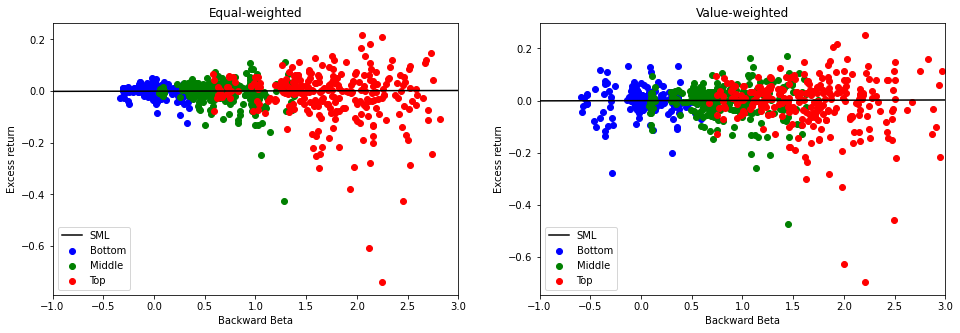

In [24]:
"""
Plot the values for the equal weighted excess returns and betas
"""

fig, ax = plt.subplots(1, 2,figsize=(16,5))
ax[0].scatter(low_val['ew_beta'],low_val['ew_excess_ret'], color='blue', label='Bottom')
ax[0].scatter(middle_val['ew_beta'],middle_val['ew_excess_ret'], color='green', label='Middle')
ax[0].scatter(high_val['ew_beta'],high_val['ew_excess_ret'], color='red', label='Top')
ax[0].plot(capm['betas'],capm['excess returns'], color='black', label='SML')
ax[0].set_xlim([-1,3])
ax[0].set_xlabel('Backward Beta')
ax[0].set_ylabel('Excess return')
ax[0].set_title('Equal-weighted')
ax[0].legend();


ax[1].scatter(low_val['vw_beta'],low_val['vw_excess_ret'], color='blue', label='Bottom')
ax[1].scatter(middle_val['vw_beta'],middle_val['vw_excess_ret'], color='green', label='Middle')
ax[1].scatter(high_val['vw_beta'],high_val['vw_excess_ret'], color='red', label='Top')
ax[1].plot(capm['betas'],capm['excess returns'], color='black', label='SML')
ax[1].set_xlim([-1,3])
ax[1].set_xlabel('Backward Beta')
ax[1].set_ylabel('Excess return')
ax[1].set_title('Value-weighted')
ax[1].legend();

## Regress forward beta values

In [26]:
"""
Apply the market forward beta function on data 
"""

regress_calc_for = {}

for i in data_calc_win.keys():
    regress_calc_for[i] = market_beta_for(df_mkt['EUROPE IM (excess)'], data_calc_win[i].iloc[:,2], 12, 24) #set minimum and max window here
    #regress_calc_for[i] = regress_calc_for[i].drop([264,265,266,267,268,269,270,271,272,273,274,275])

In [27]:
"""
We save the dictionary in memory so we can call it in another notebook
"""
with open('regress_calc_for', 'wb') as regress_for: #save backward beta
   pickle.dump(regress_calc_for, regress_for)

In [28]:
"""
We drop the last 12 observations because we know they wil be nan
"""
for i in data_calc_win.keys():
    regress_calc_for[i] = regress_calc_for[i].drop([264,265,266,267,268,269,270,271,272,273,274,275])

### Examning the numbers of beta values we get

In [29]:
"""
To count the numbers of beta values overall
"""
dim_1 = 264
dim_3 = len(data_calc_win.keys())

print(dim_1*dim_3)

check=pd.DataFrame()
check.loc['beta', 'obs'] = '{:,.0f}'.format(dim_1*dim_3-np.count_nonzero(np.isnan(np.array([regress_calc_for[j].iloc[:,1] for j in regress_calc_for.keys()]))),4)
check.loc['nan', 'obs'] = '{:,.0f}'.format(np.count_nonzero(np.isnan(np.array([regress_calc_for[j].iloc[:,1] for j in regress_calc_for.keys()]))),4)
check

59664


,obs
beta,"38,087"
nan,"21,577"


### Creating low, middle, and high beta values groups (portfolio creation)

In [31]:
"""
To have a dataframe with all the forward betas
"""
beta_for = pd.concat([regress_calc_for[i].Beta for i in list(regress_calc_for.keys())], axis=1)
#for i in regress_calc.keys():
beta_for.columns = list(regress_calc.keys())

In [32]:
"""
To create a dictionary for each portfolio group that contains a list for each timestep with the names of the banks in that group.
"""

low_group_for, middle_group_for, high_group_for = {},{},{}
no_obs_beta = beta_for.shape[0]

for i in range(no_obs_beta):
        no_betas = beta_for.iloc[i,:].count()
        no_low, no_middle = m.floor(no_betas*0.3), m.floor(no_betas*0.4) #low bottom = 30% and top bottom = 30% see BW
        no_high = no_betas - (no_low + no_middle)
        low_group_for[i]=list(beta_for.iloc[i,:].sort_values()[:no_low].index)
        middle_group_for[i]=list(beta_for.iloc[i,:].sort_values()[no_low:no_low+no_middle].index)
        high_group_for[i]=list(beta_for.iloc[i,:].sort_values()[no_low + no_middle:no_betas].index)

In [33]:
"""
We create a dictionary for the low beta group containing a dataframe for each timestep with the banks', within
the group, alpha, beta, market value, and excess return
"""

low_group_calc_for = {}

for i in low_group_for.keys():
    df = pd.DataFrame(columns=low_group_for[i])
    for j in df.columns:
        s1 = regress_calc_for[j].iloc[i,0].copy() #alpha
        s2 = regress_calc_for[j].iloc[i,1].copy() #beta
        s3 = data_calc_win[j].iloc[i,0].copy() #market value
        s4 = data_calc_win[j].iloc[i,2].copy() #excess return
        df[j] = [s1,s2,s3,s4]
    low_group_calc_for[i] = df.T
    low_group_calc_for[i].columns = ['Alpha', 'Beta', 'Market value', 'Excess return']

In [34]:
"""
We create a dictionary for the middle beta group containing a dataframe for each timestep with the banks', within
the group, alpha, beta, market value, and excess return
"""

middle_group_calc_for = {}

for i in middle_group_for.keys():
    df = pd.DataFrame(columns=middle_group_for[i])
    for j in df.columns:
        s1 = regress_calc_for[j].iloc[i,0].copy() #alpha
        s2 = regress_calc_for[j].iloc[i,1].copy() #beta
        s3 = data_calc_win[j].iloc[i,0].copy() #market value
        s4 = data_calc_win[j].iloc[i,2].copy() #excess return
        df[j] = [s1,s2,s3,s4]
    middle_group_calc_for[i] = df.T
    middle_group_calc_for[i].columns = ['Alpha', 'Beta', 'Market value', 'Excess return']

In [35]:
"""
We create a dictionary for the high beta group containing a dataframe for each timestep with the banks', within
the group, alpha, beta, market value, and excess return
"""

high_group_calc_for = {}

for i in high_group_for.keys():
    df = pd.DataFrame(columns=high_group_for[i])
    for j in df.columns:
        s1 = regress_calc_for[j].iloc[i,0].copy() #alpha
        s2 = regress_calc_for[j].iloc[i,1].copy() #beta
        s3 = data_calc_win[j].iloc[i,0].copy() #market value
        s4 = data_calc_win[j].iloc[i,2].copy() #excess return
        df[j] = [s1,s2,s3,s4]
    high_group_calc_for[i] = df.T
    high_group_calc_for[i].columns = ['Alpha', 'Beta', 'Market value', 'Excess return']

In [36]:
"""
Assigning weights based on market value
"""

for i in low_group_calc.keys():
    low_group_calc_for[i]['weight'] = low_group_calc_for[i].iloc[:,2]/(low_group_calc_for[i]['Market value'].sum())

for i in middle_group_calc.keys():
    middle_group_calc_for[i]['weight'] = middle_group_calc_for[i].iloc[:,2]/(middle_group_calc_for[i]['Market value'].sum())
    
for i in high_group_calc.keys():
    high_group_calc_for[i]['weight'] = high_group_calc_for[i].iloc[:,2]/(high_group_calc_for[i]['Market value'].sum())

In [37]:
"""
Create equal-weighted and value-weighted for the low beta group
"""

low_val_for = pd.DataFrame(columns=['ew_excess_ret', 'ew_beta', 'ew_alpha', 'vw_excess_ret','vw_beta', 'vw_alpha'])

for i in low_group_calc_for.keys():
    low_val_for.loc[i,'ew_excess_ret'] = (low_group_calc_for[i]['Excess return']*(1/len(low_group_for[i]))).sum()
    low_val_for.loc[i,'ew_beta'] = (low_group_calc_for[i]['Beta']*(1/len(low_group_for[i]))).sum()
    low_val_for.loc[i,'ew_alpha'] = (low_group_calc_for[i]['Alpha']*(1/len(low_group_for[i]))).sum()
    low_val_for.loc[i,'vw_excess_ret'] = (low_group_calc_for[i]['Excess return']*low_group_calc_for[i]['weight']).sum()
    low_val_for.loc[i,'vw_beta'] = (low_group_calc_for[i]['Beta']*low_group_calc_for[i]['weight']).sum()
    low_val_for.loc[i,'vw_alpha'] = (low_group_calc_for[i]['Alpha']*low_group_calc_for[i]['weight']).sum()

In [38]:
"""
Create equal-weighted and value-weighted for the middle beta group
"""

middle_val_for = pd.DataFrame(columns=['ew_excess_ret', 'ew_beta', 'ew_alpha', 'vw_excess_ret','vw_beta', 'vw_alpha'])

for i in middle_group_calc_for.keys():
    middle_val_for.loc[i,'ew_excess_ret'] = (middle_group_calc_for[i]['Excess return']*(1/len(middle_group_for[i]))).sum()
    middle_val_for.loc[i,'ew_beta'] = (middle_group_calc_for[i]['Beta']*(1/len(middle_group_for[i]))).sum()
    middle_val_for.loc[i,'ew_alpha'] = (middle_group_calc_for[i]['Alpha']*(1/len(middle_group_for[i]))).sum()
    middle_val_for.loc[i,'vw_excess_ret'] = (middle_group_calc_for[i]['Excess return']*middle_group_calc_for[i]['weight']).sum()
    middle_val_for.loc[i,'vw_beta'] = (middle_group_calc_for[i]['Beta']*middle_group_calc_for[i]['weight']).sum()
    middle_val_for.loc[i,'vw_alpha'] = (middle_group_calc_for[i]['Alpha']*middle_group_calc_for[i]['weight']).sum()

In [39]:
"""
Create equal-weighted and value-weighted for the high beta group
"""

high_val_for = pd.DataFrame(columns=['ew_excess_ret', 'ew_beta', 'ew_alpha', 'vw_excess_ret','vw_beta', 'vw_alpha'])

for i in high_group_calc_for.keys():
    high_val_for.loc[i,'ew_excess_ret'] = (high_group_calc_for[i]['Excess return']*(1/len(high_group_for[i]))).sum()
    high_val_for.loc[i,'ew_beta'] = (high_group_calc_for[i]['Beta']*(1/len(high_group_for[i]))).sum()
    high_val_for.loc[i,'ew_alpha'] = (high_group_calc_for[i]['Alpha']*(1/len(high_group_for[i]))).sum()
    high_val_for.loc[i,'vw_excess_ret'] = (high_group_calc_for[i]['Excess return']*high_group_calc_for[i]['weight']).sum()
    high_val_for.loc[i,'vw_beta'] = (high_group_calc_for[i]['Beta']*high_group_calc_for[i]['weight']).sum()
    high_val_for.loc[i,'vw_alpha'] = (high_group_calc_for[i]['Alpha']*high_group_calc_for[i]['weight']).sum()

### Forward beta results

In [40]:
"""
Mean excess return, forward beta and alpha for the forward beta
"""

descriptive10 = pd.DataFrame(columns=['Mean Excess return', 'Beta', 'Alpha'])

descriptive10.loc['Low beta Equal weighted', 'Mean Excess return'] = round(geomean(low_val_for.iloc[:,0]),4)
descriptive10.loc['Low beta Equal weighted', 'Beta'] = round(np.mean(low_val_for.iloc[:,1]),4)
descriptive10.loc['Low beta Equal weighted', 'Alpha'] = round(np.mean(low_val_for.iloc[:,2]),4)
descriptive10.loc['Low beta Value weighted', 'Mean Excess return'] = round(geomean(low_val_for.iloc[:,3]),4)
descriptive10.loc['Low beta Value weighted', 'Beta'] = round(np.mean(low_val_for.iloc[:,4]),4)
descriptive10.loc['Low beta Value weighted', 'Alpha'] = round(np.mean(low_val_for.iloc[:,5]),4)
descriptive10.loc['Middle beta Equal weighted', 'Mean Excess return'] = round(geomean(middle_val_for.iloc[:,0]),4)
descriptive10.loc['Middle beta Equal weighted', 'Beta'] = round(np.mean(middle_val_for.iloc[:,1]),4)
descriptive10.loc['Middle beta Equal weighted', 'Alpha'] = round(np.mean(middle_val_for.iloc[:,2]),4)
descriptive10.loc['Middle beta Value weighted', 'Mean Excess return'] = round(geomean(middle_val_for.iloc[:,3]),4)
descriptive10.loc['Middle beta Value weighted', 'Beta'] = round(np.mean(middle_val_for.iloc[:,4]),4)
descriptive10.loc['Middle beta Value weighted', 'Alpha'] = round(np.mean(middle_val_for.iloc[:,5]),4)
descriptive10.loc['High beta Equal weighted', 'Mean Excess return'] = round(geomean(high_val_for.iloc[:,0]),4)
descriptive10.loc['High beta Equal weighted', 'Beta'] = round(np.mean(high_val_for.iloc[:,1]),4)
descriptive10.loc['High beta Equal weighted', 'Alpha'] = round(np.mean(high_val_for.iloc[:,2]),4)
descriptive10.loc['High beta Value weighted', 'Mean Excess return'] = round(geomean(high_val_for.iloc[:,3]),4)
descriptive10.loc['High beta Value weighted', 'Beta'] = round(np.mean(high_val_for.iloc[:,4]),4)
descriptive10.loc['High beta Value weighted', 'Alpha'] = round(np.mean(high_val_for.iloc[:,5]),4)

descriptive10

,Mean Excess return,Beta,Alpha
Low beta Equal weighted,-0.0023,0.036,0.0005
Low beta Value weighted,-0.003,0.0243,-0.0048
Middle beta Equal weighted,-0.0057,0.701,-0.0046
Middle beta Value weighted,-0.0076,0.8504,-0.0064
High beta Equal weighted,-0.0232,1.7589,-0.0193
High beta Value weighted,-0.0153,1.7044,-0.0141


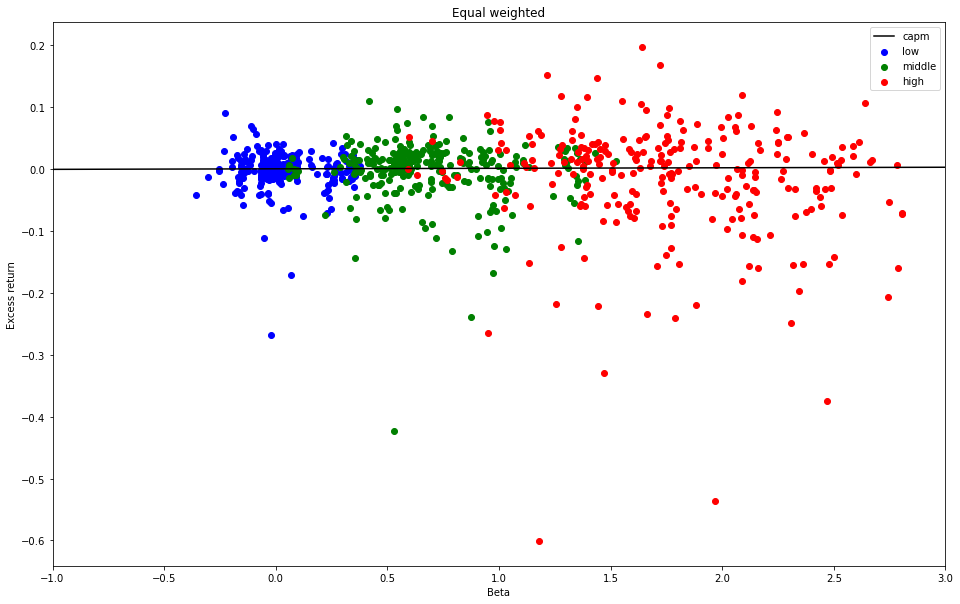

In [41]:
"""
Plot the values for the equal-weighted excess returns and forward betas
"""

fig, ax = plt.subplots(1, 1,figsize=(16,10))
ax.scatter(low_val_for['ew_beta'],low_val_for['ew_excess_ret'], color='blue', label='low')
ax.scatter(middle_val_for['ew_beta'],middle_val_for['ew_excess_ret'], color='green', label='middle')
ax.scatter(high_val_for['ew_beta'],high_val_for['ew_excess_ret'], color='red', label='high')
ax.plot(capm['betas'],capm['excess returns'], color='black', label='capm')
ax.set_xlim([-1,3])
#ax.set_ylim([-0.1,0.1])
ax.set_xlabel('Beta')
ax.set_ylabel('Excess return')
ax.set_title('Equal weighted')
ax.legend();

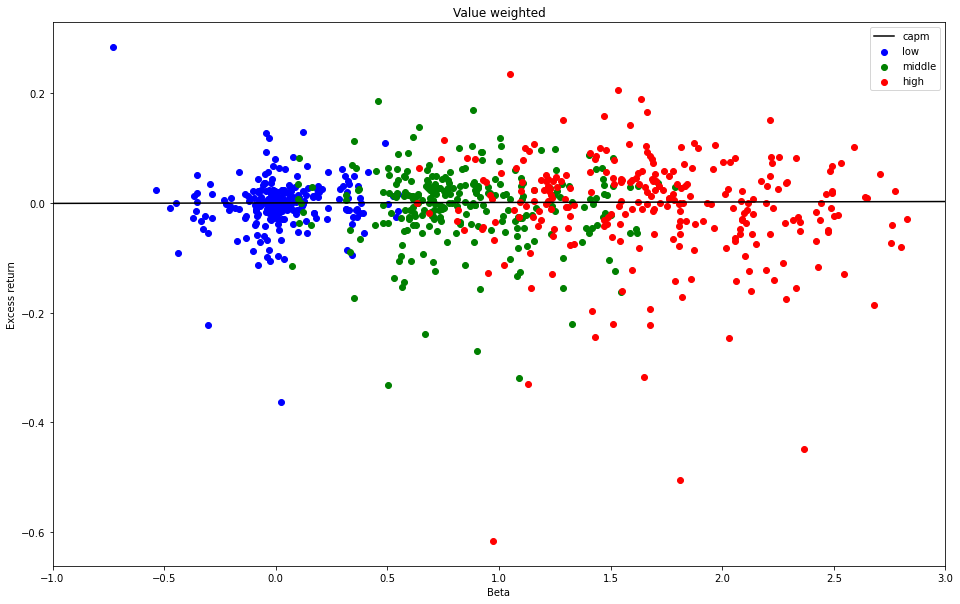

In [42]:
"""
Plot the values for the value-weighted excess returns and forward betas
"""

fig, ax = plt.subplots(1, 1,figsize=(16,10))
ax.scatter(low_val_for['vw_beta'],low_val_for['vw_excess_ret'], color='blue', label='low')
ax.scatter(middle_val_for['vw_beta'],middle_val_for['vw_excess_ret'], color='green', label='middle')
ax.scatter(high_val_for['vw_beta'],high_val_for['vw_excess_ret'], color='red', label='high')
ax.plot(capm['betas'],capm['excess returns'], color='black', label='capm')
ax.set_xlim([-1,3])
#ax.set_ylim([-0.1,0.1])
ax.set_xlabel('Beta')
ax.set_ylabel('Excess return')
ax.set_title('Value weighted')
ax.legend();

## Step 2 in Baker & Wurgler 
Alpha regressed on betas. The slope should be negative if there exists a low risk anomaly.
Baker & Wurgler uses pre-ranking risk (backward beta) 


In [43]:
"""
Create a dictionary that contains the 3 groups of weighted excess return, backward beta and alphas (both equal and value weighted)
"""
dict_ = {}
dict_[0] = low_val
dict_[1] = middle_val
dict_[2] = high_val

### Second regression

In [62]:
"""
EQUAL-WEIGHTED 
Based on the equal weighted excess return (backward beta groups) we estimate alpha and beta so we get a new 
timeserie with 264 alphas and betas for the 3 equal weighted groups
"""
descriptive14 = pd.DataFrame()

for i in dict_.keys():    
    Y = dict_[i]['ew_excess_ret'].astype('float64')
    X = df_mkt['EUROPE IM (excess)'].iloc[:-12].astype('float64').to_numpy().reshape(-1,1)

    lm = LinearRegression()
    lm.fit(X,Y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,4)
    params = np.round(params,4)
    r2 = r2_score(Y,predictions)

    descriptive14.loc['Alpha', i] = params[0]
    descriptive14.loc['Alpha T-stat', i] = ts_b[0]
    descriptive14.loc['Alpha p-value', i] = p_values[0]
    descriptive14.loc['Beta', i] = params[1]
    descriptive14.loc['Beta T-stat', i] = ts_b[1]
    descriptive14.loc['Beta p-value', i] = p_values[1]
    descriptive14.loc['R-squared', i] = r2
    
descriptive14.columns=['Low beta portfolio', 'Middle beta portfolio', 'High beta portfolio']
descriptive14

,Low beta portfolio,Middle beta portfolio,High beta portfolio
Alpha,-0.00150,-0.005400,-0.021400
Alpha T-stat,-1.16400,-2.349000,-4.786000
Alpha p-value,0.24570,0.019600,0.000000
Beta,0.11020,0.744600,1.780800
Beta T-stat,3.84700,14.491000,17.793000
Beta p-value,0.00020,0.000000,0.000000
R-squared,0.05346,0.444903,0.547163


In [63]:
"""
VALUE-WEIGHTED 
Based on the value weighted excess return (backward beta groups) we estimate alpha and beta so we get a new 
timeserie with 264 alphas and betas for the 3 value weighted groups
"""
descriptive15 = pd.DataFrame()

for i in dict_.keys():    
    Y = dict_[i]['vw_excess_ret'].astype('float64')
    X = df_mkt['EUROPE IM (excess)'].iloc[:-12].astype('float64').to_numpy().reshape(-1,1)

    lm = LinearRegression()
    lm.fit(X,Y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,4)
    params = np.round(params,4)
    r2 = r2_score(Y,predictions)

    descriptive15.loc['Alpha', i] = params[0]
    descriptive15.loc['Alpha T-stat', i] = ts_b[0]
    descriptive15.loc['Alpha p-value', i] = p_values[0]
    descriptive15.loc['Beta', i] = params[1]
    descriptive15.loc['Beta T-stat', i] = ts_b[1]
    descriptive15.loc['Beta p-value', i] = p_values[1]
    descriptive15.loc['R-squared', i] = r2
    
descriptive15.columns=['Low beta portfolio', 'Middle beta portfolio', 'High beta portfolio']
descriptive15

,Low beta portfolio,Middle beta portfolio,High beta portfolio
Alpha,-0.000800,-0.004200,-0.012900
Alpha T-stat,-0.319000,-1.340000,-2.891000
Alpha p-value,0.750100,0.181300,0.004200
Beta,0.065200,0.855200,1.716700
Beta T-stat,1.100000,12.267000,17.198000
Beta p-value,0.272400,0.000000,0.000000
R-squared,0.004597,0.364803,0.530282


### Third regression

In [64]:
"""
We collect the six alphas in one dataframe
"""

s1 = descriptive14.iloc[0,:].copy()
s2 = descriptive15.iloc[0,:].copy()
alphas = pd.concat([s1,s2])

In [65]:
"""
We collect the six betas in one dataframe
"""
s1 = descriptive14.iloc[3,:].copy()
s2 = descriptive15.iloc[3,:].copy()
betas = pd.concat([s1,s2])

In [67]:
"""
We perform the third regression in order to determine whether there is a low risk anomaly
"""
Y = alphas.tolist()
X = betas.tolist() 
X2 = sm.add_constant(X)
result = sm.OLS(Y, X2).fit()
print(result.summary())
#We have a insigninficant slope so we cannot determine whether the slope is different from 0 or not

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     22.94
Date:                Wed, 04 May 2022   Prob (F-statistic):            0.00871
Time:                        15:55:51   Log-Likelihood:                 26.741
No. Observations:                   6   AIC:                            -49.48
Df Residuals:                       4   BIC:                            -49.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.002      0.422      0.6

/Users/julielaustsen/opt/anaconda3/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [68]:
"""
We create a dataframe in order to draw the linear regression
"""
line = pd.DataFrame()
line['fik betas']=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1, 1.25, 1.5, 1.75, 2]
line['line']=result.params[0]*10000+result.params[1]*10000*line['fik betas'] #the values is from above regression. We multiply with 1000 to get bps

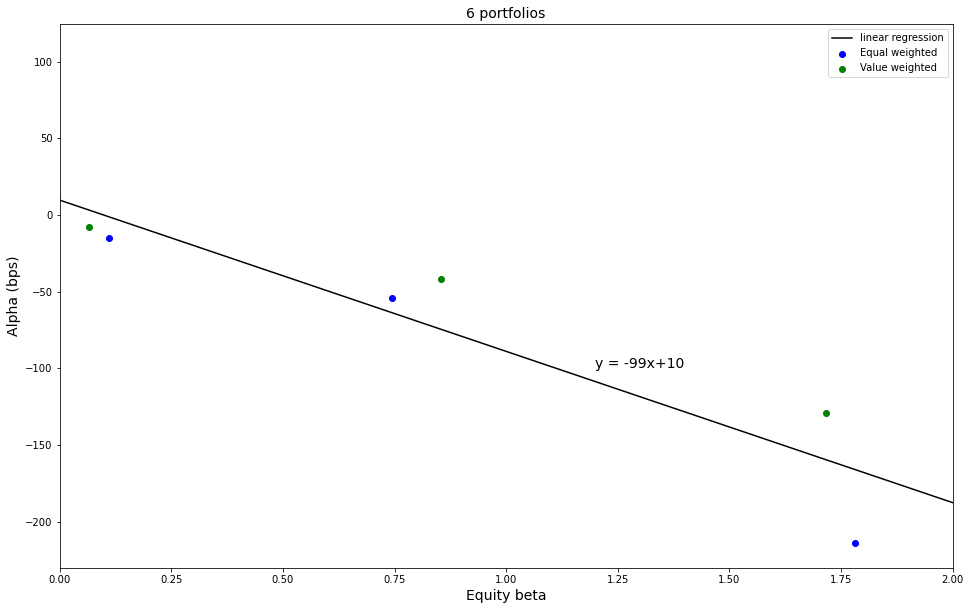

In [76]:
"""
We plot the linear regression along with the 6 pairs of alpha and beta
"""
fig, ax = plt.subplots(1, 1,figsize=(16,10))
ax.scatter(descriptive14.iloc[3,:],descriptive14.iloc[0,:]*10000, color='blue', label='Equal weighted')
ax.scatter(descriptive15.iloc[3,:],descriptive15.iloc[0,:]*10000, color='green', label='Value weighted')
ax.plot(line['fik betas'],line['line'], color='black', label='linear regression')
ax.set_xlim([-0,2])
ax.set_xlabel('Equity beta').set_fontsize(14)
ax.set_ylabel('Alpha (bps)').set_fontsize(14)
ax.set_title('6 portfolios').set_fontsize(14)
ax.text(1.20,-100,'y = -99x+10').set_fontsize(14) #OBS change here manuelt 
ax.legend();